# CORONA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### EINLESEN

In [2]:
df = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")
df = df.loc[df["location"] == "Germany"]
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
12127,DEU,Europe,Germany,2019-12-31,NaN,0.0,NaN,NaN,0.0,NaN,...,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.936
12128,DEU,Europe,Germany,2020-01-01,NaN,0.0,NaN,NaN,0.0,NaN,...,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.936
12129,DEU,Europe,Germany,2020-01-02,NaN,0.0,NaN,NaN,0.0,NaN,...,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.936
12130,DEU,Europe,Germany,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.936
12131,DEU,Europe,Germany,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12420,DEU,Europe,Germany,2020-10-19,366299.0,4325.0,5852.571,9789.0,12.0,24.000,...,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.936
12421,DEU,Europe,Germany,2020-10-20,373167.0,6868.0,6244.857,9836.0,47.0,28.857,...,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.936
12422,DEU,Europe,Germany,2020-10-21,380762.0,7595.0,6596.714,9875.0,39.0,28.286,...,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.936
12423,DEU,Europe,Germany,2020-10-22,392049.0,11287.0,7260.857,9905.0,30.0,27.857,...,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.936


### PREPROCESSING

In [3]:
df["date"] = pd.to_datetime(df["date"])
df = df.set_index("date")
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 298 entries, 2019-12-31 to 2020-10-23
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         298 non-null    object 
 1   continent                        298 non-null    object 
 2   location                         298 non-null    object 
 3   total_cases                      270 non-null    float64
 4   new_cases                        298 non-null    float64
 5   new_cases_smoothed               292 non-null    float64
 6   total_deaths                     228 non-null    float64
 7   new_deaths                       298 non-null    float64
 8   new_deaths_smoothed              292 non-null    float64
 9   total_cases_per_million          270 non-null    float64
 10  new_cases_per_million            298 non-null    float64
 11  new_cases_smoothed_per_million   292 non-null    float64
 12  tot

### ANALYSEN

**Wie viele Tests werden gemacht?**

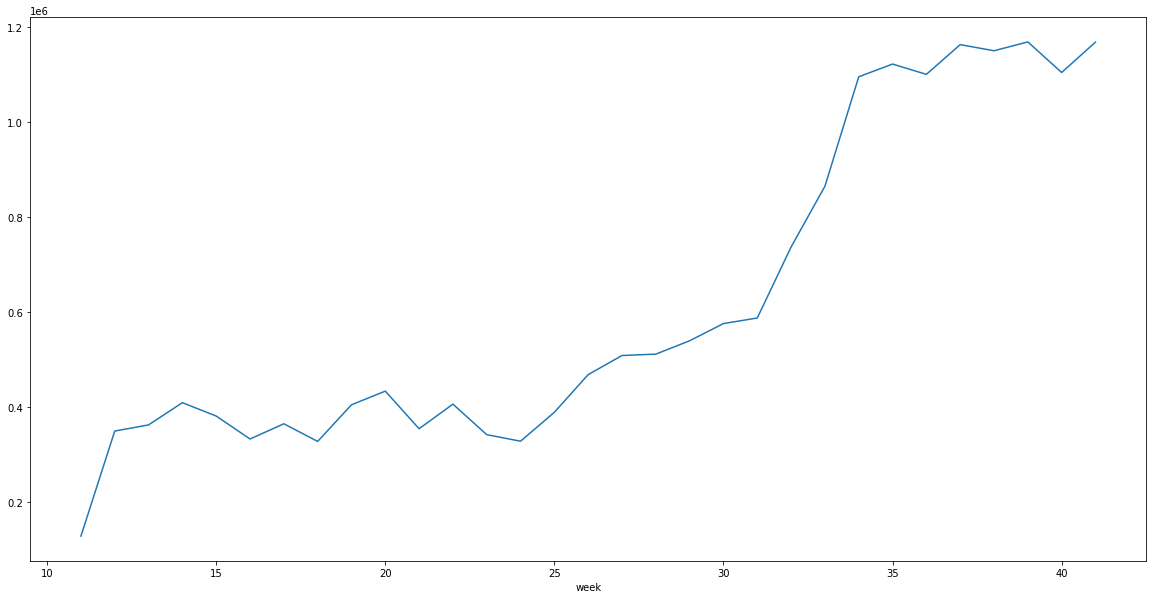

In [4]:
df_weekly = df.groupby(df.index.isocalendar().week).agg({"new_cases": "sum", "total_tests": "max"}).dropna()
df_weekly.columns = ["new_cases", "new_tests"]
df_weekly["new_tests"] = df_weekly["new_tests"].diff()
df_weekly = df_weekly.dropna()
df_weekly["new_tests"].plot(figsize=(20, 10))

**Wie unterscheiden sich die Wellen, wenn man `Anzahl Fälle` mit `Anzahl Fälle / Anzahl Tests` vergleicht?**

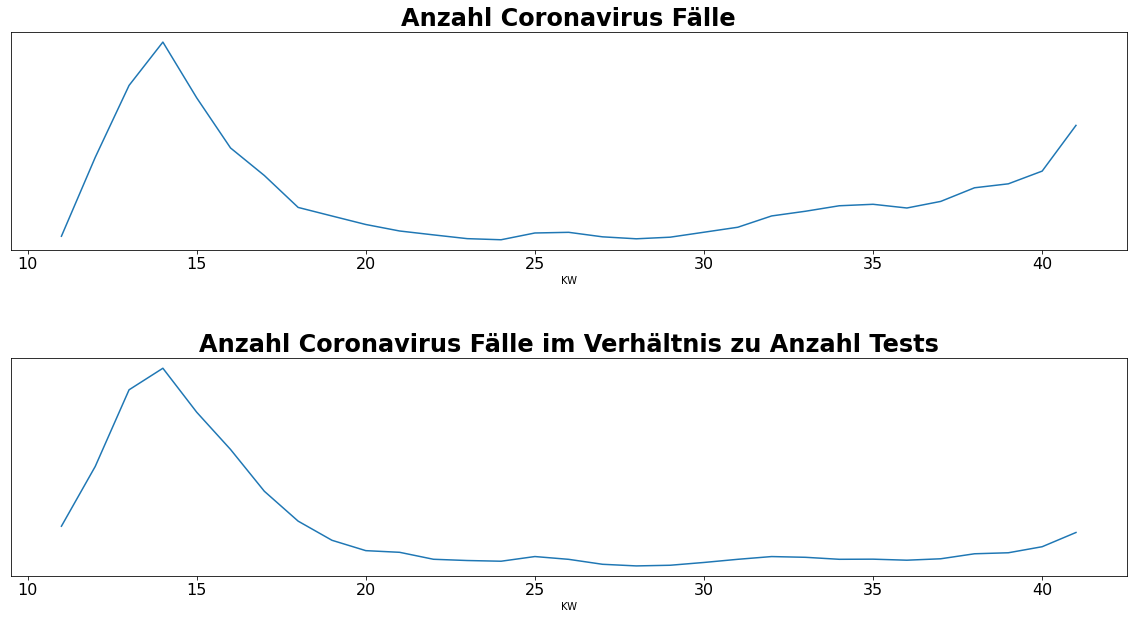

In [5]:
df_weekly["new_cases/new_tests"] = df_weekly["new_cases"]/df_weekly["new_tests"]*1000

fig, axes = plt.subplots(2, figsize=(20, 10))
fig.subplots_adjust(hspace=0.5)
axes[0].set_title("Anzahl Coronavirus Fälle", size=24, fontweight="bold")
axes[1].set_title("Anzahl Coronavirus Fälle im Verhältnis zu Anzahl Tests", size=24, fontweight="bold")
axes[0].set_yticks([])
axes[1].set_yticks([])
df_weekly["new_cases"].dropna().plot(figsize=(20, 10), ax=axes[0], xlabel="KW", fontsize=16)
df_weekly["new_cases/new_tests"].dropna().plot(figsize=(20, 10), ax=axes[1], xlabel="KW", fontsize=16)